In [ ]:
%config InlineBackend.figure_format = 'retina'

# Testing Enviornment

In [ ]:
import pandas as pd
from pandas import DataFrame
import numpy as np

## Running tests

The following section unit-tests most of the code written for the proof of concept prototype.

In [ ]:
%run ../test/test_algorithms.py

In [ ]:
%run ../test/test_dataloader.py

In [ ]:
%run ../test/test_predictorsI.py

In [ ]:
%run ../test/test_predictorsII.py

In [ ]:
%run ../test/test_predictorsIII.py

In [ ]:
%run ../test/test_activate.py

In [ ]:
%run ../test/test_evaluation.py

## Running example of the system

In [ ]:
%run ../consensus/algorithms.py

In [ ]:
%run ../tools/dataloader.py

In [ ]:
test = DataLoader('aapl', '2010-02-01', '2010-02-11')

In [ ]:
test.get_data()

In [ ]:
prices = test.get_close()

In [ ]:
prices

In [ ]:
#prices = np.array(prices)
#len(prices)

In [ ]:
prices

In [ ]:
%run ../tools/predictorsI.py

In [ ]:
op0 = BasicUnivariatePredictor(prices, 24, 30)
op1 = BasicUnivariatePredictor(prices, 25, 7)
op2 = BasicUnivariatePredictor(prices, 25, 7)
op3 = BasicUnivariatePredictor(prices, 25, 7)

In [ ]:
op0.create_bilstm()

In [ ]:
op0.model_blueprint()

In [ ]:
op0.fit_model(150)

In [ ]:
op0.show_performance()

In [ ]:
op0.save_model()

In [ ]:
oyea = prices[-26:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op0.predict(oyea)
nice

In [ ]:
op1.create_lstm()

In [ ]:
op1.model_blueprint()

In [ ]:
op1.fit_model(10)

In [ ]:
op1.show_performance()

In [ ]:
nice = op1.predict(oyea)
nice

In [ ]:
op2.create_cnn()

In [ ]:
op2.model_blueprint()

In [ ]:
op2.fit_model(10)

In [ ]:
op2.show_performance()

In [ ]:
nice = op2.predict(oyea)
nice

In [ ]:
op3.create_mlp()

In [ ]:
op3.model_blueprint()

In [ ]:
op3.fit_model(100)

In [ ]:
op3.show_performance()

In [ ]:
oyea = prices[-26:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op3.predict(oyea)
nice

In [ ]:
%run ../tools/predictorsII.py

In [ ]:
oo = UnivariatePredictorII(prices, 7)

In [ ]:
oo.fit_neural_model(100,"D")

In [ ]:
oo.show_performance_neural()

In [ ]:
oo.predict_neural()

In [ ]:
oo.fit_prophet_model()

In [ ]:
oo.show_performance_prophet()

In [ ]:
oo.predict_prophet()

In [ ]:
%run ../tools/predictorsIII.py

In [ ]:
len(prices)

In [ ]:
op4 = HybridUnivariatePredictor(prices,2, 24, 7)

In [ ]:
op4.create_cnnlstm()

In [ ]:
op4.model_blueprint()

In [ ]:
op4.fit_model(10)

In [ ]:
op4.show_performance()

In [ ]:
oyea = prices[-25:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op4.predict(oyea)
nice
#noice = pd.DataFrame(nice, columns=['yea'])
#noice = nice.reshape(20, 1)
#noice = pd.DataFrame(noice, columns=['yea'])

In [ ]:
nice.plot()

## Whole system test - I am alive v.3

In [ ]:
%run ../tools/dataloader.py
%run ../system/activate.py

In [ ]:
training = DataLoader('aapl', '2009-01-01', '2010-05-01')

In [ ]:
training = training.get_close()

In [ ]:
# adjusted close

In [ ]:
%run ../tools/dataloader.py
%run ../system/activate.py

In [ ]:
predict = DataLoader('BP', '2018-05-02', '2018-08-01')
predict = predict.calculate_returns_adj()

In [ ]:
predict = predict[1:]

In [ ]:
training = DataLoader('BP', '2015-01-01', '2018-01-01') # loading training DataFrame to train model on
training = training.calculate_returns_adj()

In [ ]:
training = training[1:]

In [ ]:
predict_req, real = data_prep(predict, 30, 5) # dividing data into predictor input and real data

In [ ]:
individual_predictors_forecasts = individual_predictors_template0(training, predict_req, 5, 10) # make forecast

In [ ]:
consensus_forecasts = consensus(individual_predictors_forecasts, real) # create consolidation values

In [ ]:
all_forecasts = combined_frame(individual_predictors_forecasts, consensus_forecasts, real)

In [ ]:
all_forecasts

In [ ]:
prediction_error = absolute_error_analytics(individual_predictors_forecasts, consensus_forecasts, real) # create absolute error DataFrame

In [ ]:
prediction_error

In [ ]:
mse = mse_score(all_forecasts, True)
mse

In [ ]:
mse_log = mse_log_score(all_forecasts, True)
mse_log

In [ ]:
mae = mae_score(all_forecasts, True)
mae

In [ ]:
plot_performance(all_forecasts)

In [1]:
%run ../system/activate.py

In [2]:
%run ../experimental/predictorsX.py

In [3]:
train = DataLoader('BP', '2017-01-01', '2018-08-01')
train = train.get_data()

[*********************100%***********************]  1 of 1 completed


In [4]:
predict = DataLoader('BP', '2018-02-01', '2018-05-01')
predict = predict.get_data()

[*********************100%***********************]  1 of 1 completed


In [5]:
test = BasicMultivariatePredictor(25, 15, train)

In [6]:
test.create_mlp()

In [7]:
test.fit_model(10)

Epoch 1/10
29/29 [==============================] - 0s 6ms/step - loss: 663.4504 - mean_squared_error: 663.4504 - val_loss: 683.6784 - val_mean_squared_error: 683.6784
Epoch 2/10
29/29 [==============================] - 0s 2ms/step - loss: 281.0433 - mean_squared_error: 281.0433 - val_loss: 229.9112 - val_mean_squared_error: 229.9112
Epoch 3/10
29/29 [==============================] - 0s 2ms/step - loss: 64.5299 - mean_squared_error: 64.5299 - val_loss: 21.9504 - val_mean_squared_error: 21.9504
Epoch 4/10
29/29 [==============================] - 0s 2ms/step - loss: 3.7559 - mean_squared_error: 3.7559 - val_loss: 9.4614 - val_mean_squared_error: 9.4614
Epoch 5/10
29/29 [==============================] - 0s 2ms/step - loss: 2.4146 - mean_squared_error: 2.4146 - val_loss: 8.8367 - val_mean_squared_error: 8.8367
Epoch 6/10
29/29 [==============================] - 0s 2ms/step - loss: 2.2868 - mean_squared_error: 2.2868 - val_loss: 5.6162 - val_mean_squared_error: 5.6162
Epoch 7/10
29/29 [==

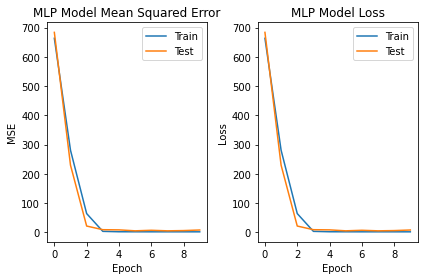

In [8]:
test.show_performance()

In [ ]:
predict

In [9]:
predict2 = predict[['Open', 'High', 'Low', 'Adj Close']]
predict2

,Open,High,Low,Adj Close
Date,,,,
2018-02-01,42.799999,43.380001,42.720001,34.823174
2018-02-02,42.599998,42.610001,41.090000,33.056301
2018-02-05,40.779999,40.869999,36.150002,31.947998
2018-02-06,39.540001,40.840000,39.419998,32.582458
2018-02-07,40.540001,41.009998,39.919998,32.124687
...,...,...,...,...
2018-04-25,43.840000,44.230000,43.450001,36.008873
2018-04-26,44.750000,44.889999,44.650002,36.563232
2018-04-27,44.299999,44.490002,44.060001,36.049637


In [10]:
predict3 = pred_input(predict2, 20, 'Adj Close')

In [ ]:
predict3.shape

In [11]:
test.predict(predict3)

ValueError: in user code:

    C:\Users\Max\Anaconda3\envs\sys\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\Users\Max\Anaconda3\envs\sys\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Max\Anaconda3\envs\sys\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Max\Anaconda3\envs\sys\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Max\Anaconda3\envs\sys\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Max\Anaconda3\envs\sys\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    C:\Users\Max\Anaconda3\envs\sys\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    C:\Users\Max\Anaconda3\envs\sys\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\Max\Anaconda3\envs\sys\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 75 but received input with shape [None, 60]


In [ ]:
test.model_blueprint()

In [ ]:
test.save_model()

In [ ]:
test.load_model('cnn')

In [ ]:
test.set_model_id('CNN')